In [3]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib as plt
import numpy as np

a = bagreader("data/stand_data.bag")
b = bagreader("data/walking_data.bag")

gps_stand_msg = a.message_by_topic('/gps')
gps_walk_msg = b.message_by_topic('/gps')

gps_stand = pd.read_csv(gps_stand_msg)
gps_walk = pd.read_csv(gps_walk_msg)

for row in range(len(gps_stand.index)):
   gps_stand.loc[row, 'Time'] = str(row)
   
for row in range(len(gps_walk.index)):
   gps_walk.loc[row, 'Time'] = str(row)
   
w_min_easting = gps_walk['UTM_easting'].min()
w_min_northing = gps_walk['UTM_northing'].min()

s_min_easting = gps_stand['UTM_easting'].min()
s_min_northing = gps_stand['UTM_northing'].min()

#Actual UTM coordinate
actual_easting = 327183
actual_northing = 4688763

#Scaling by subtracting every value from minimum
scaled_actual_easting = abs(actual_easting - s_min_easting)
scaled_actual_northing = abs(actual_northing - s_min_northing)
gps_walk['UTM_easting(scaled)'] = gps_walk['UTM_easting'] - w_min_easting
gps_walk['UTM_northing(scaled)'] = gps_walk['UTM_northing'] - w_min_northing

gps_stand['UTM_easting(scaled)'] = gps_stand['UTM_easting'] - s_min_easting
gps_stand['UTM_northing(scaled)'] = gps_stand['UTM_northing'] - s_min_northing


#Calculating average for northing and easting(staionary)
s_avg_easting = gps_stand["UTM_easting(scaled)"].mean()
s_avg_northing = gps_stand["UTM_northing(scaled)"].mean()
#Calculating percent error w.r.t actual location (google maps)for northing and easting for each point(stationary)
error_easting = abs((s_avg_easting - scaled_actual_easting) / scaled_actual_easting) * 100
error_northing = abs((s_avg_northing - scaled_actual_northing) / scaled_actual_northing) * 100

print(s_avg_easting, s_avg_northing, scaled_actual_easting)
print("Stationary Data:\n Easting: {:.2f}% Error \t Northing: {:.2f}% Error".format(error_easting, error_northing))

gps_walk.to_csv("walking_data.csv", index=False)
gps_stand.to_csv("standing_data.csv", index=False)




[INFO]  Data folder data/stand_data already exists. Not creating.
[INFO]  Data folder data/walking_data already exists. Not creating.
0.7151235796606422 2.6641147713261573 1.1705245792400092
Stationary Data:
 Easting: 38.91% Error 	 Northing: 34.71% Error


Text(0, 0.5, 'Altitude (meters)')

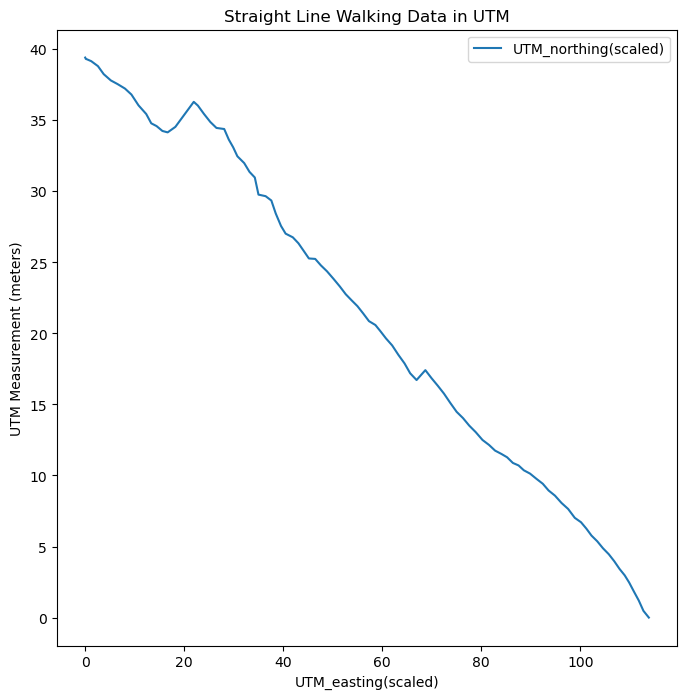

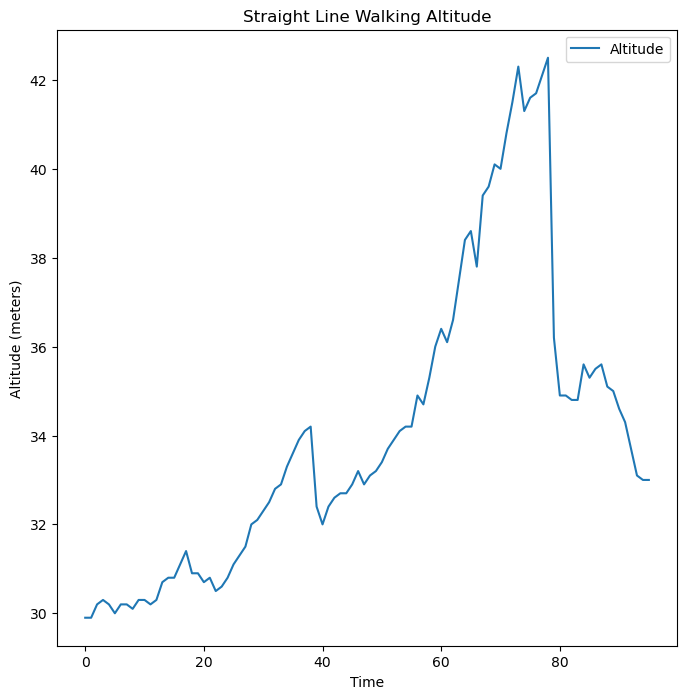

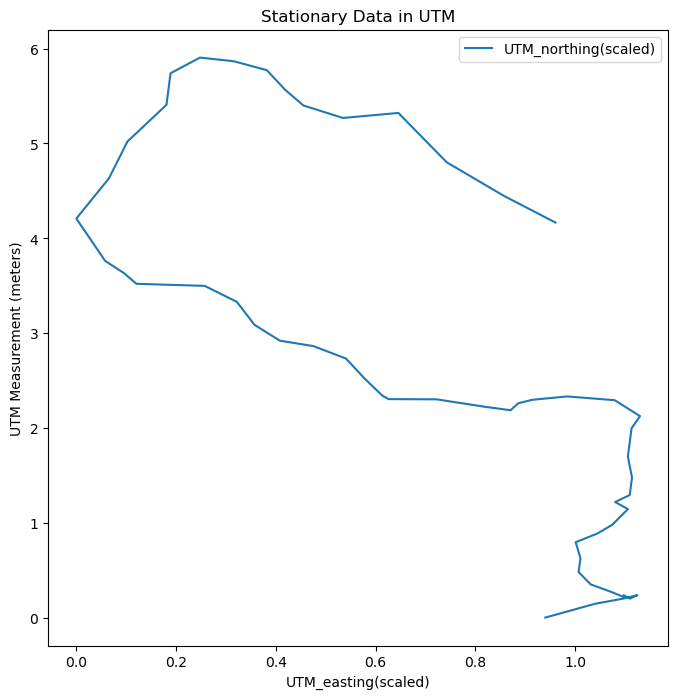

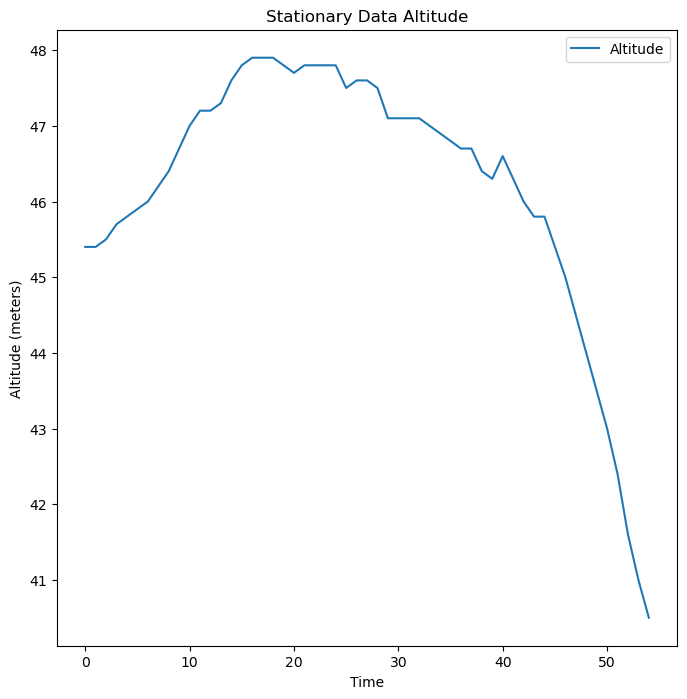

In [4]:
#Plotting
ax_walk= gps_walk.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "line",figsize = (8,8) ,title = "Straight Line Walking Data in UTM")
ax_walk.set_ylabel("UTM Measurement (meters)")
ax1_walk = gps_walk.plot(x ='Time', y ="Altitude", kind = "line", figsize = (8,8), title = "Straight Line Walking Altitude")
ax1_walk.set_ylabel("Altitude (meters)")


ax_stand= gps_stand.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "line", figsize = (8,8), title = "Stationary Data in UTM")
ax_stand.set_ylabel("UTM Measurement (meters)")
ax1_stand = gps_stand.plot(x ='Time', y ="Altitude", kind = "line", figsize = (8,8), title = "Stationary Data Altitude")
ax1_stand.set_ylabel("Altitude (meters)")

